# Εργασία 2

### Ερώτημα Α: Brute force αλγόριθμος

Ερώτημα Α.1) Να αναπτύξετε έναν “brute force” αλγόριθμο για την επίλυση του προβλήματος k-center.

In [ ]:
import networkx as nx
import random
import itertools
from timeit import default_timer
import matplotlib.pyplot as plt

In [ ]:
# Υπολογισμός του κόστους μιας συγκεκριμένης λύσης για το k-center πρόβλημα
def k_centers_objective_value(G, centers):
    max_min_weight = 0;
    for n in range(len(G)):
        if n not in centers:
            min_weight_n = 10000
            for c in centers:
                if c == n:
                    continue
                else:
                    w = G[n][c]['weight']
                if w < min_weight_n:
                    min_weight_n = w;
            if min_weight_n > max_min_weight:
                max_min_weight = min_weight_n
    return max_min_weight

In [ ]:
# Έλεγχος και αξιολόγηση της απάντησης. Μην κάνετε αλλαγές στο κελί αυτό.
!pip install nose

from nose.tools import assert_equal

G = nx.read_gexf('graph_0005_01234.gexf', node_type=int)
assert_equal(k_centers_objective_value(G, [0, 1]), 156)
assert_equal(k_centers_objective_value(G, [0, 1, 2]), 130)

G = nx.read_gexf('graph_0010_01234.gexf', node_type=int)
assert_equal(k_centers_objective_value(G, [2, 4]), 338)
assert_equal(k_centers_objective_value(G, [0, 1, 2]), 257)


     |████████████████████████████████| 163kB 2.8MB/s 


FileNotFoundError: ignored

In [ ]:
# Να συμπληρώσετε τον κώδικα της συνάρτησης k_centers_brute_force(G, k) ώστε να υπολογίζει 
# με brute force τρόπο τη βέλτιστη λύση μεγέθους k για τον γράφο G. 
# Η συνάρτηση να επιστρέφει το κόστος και τη λίστα των centers της βέλτισης λύσης.

def k_centers_brute_force(G, k):
    V = G.nodes
    comb = itertools.combinations(V, k)
    min_score = 100000
    for c in comb:
        score = k_centers_objective_value(G, c)
        if score < min_score:
            min_score = score;
            best_comb = c
    return  min_score,list(best_comb)

In [ ]:
# Έλεγχος και αξιολόγηση της απάντησης. Μην κάνετε αλλαγές στο κελί αυτό.

G = nx.read_gexf('graph_0005_01234.gexf', node_type=int)
assert_equal(k_centers_brute_force(G, 2), (152, [0,3]))

G = nx.read_gexf('graph_0010_01234.gexf', node_type=int)
assert_equal(k_centers_brute_force(G, 2), (263, [0,8]))


Ερώτημα Α.2) Να εφαρμόσετε τον “brute force” αλγόριθμο για την εύρεση της βέλτιστης λύσης 
των στιγμιοτύπων με k=3 στους γράφους
graph_0005_01234.gexf, graph_0010_01234.gexf, graph_0020_01234.gexf και graph_0050_01234.gexf. 
Να μετρήσετε τον χρόνο εκτέλεσης του αλγορίθμου για κάθε περίπτωση και να απεικονίσετε τους 
χρόνους σε γραφική παράσταση. Στον άξονα των x να υπάρχει το πλήθος των κόμβων του γράφου.

Graph: graph_0005_01234.gexf
Execution time:  0.0008140940001339914
Best score:  130.0
Best comb:  (0, 1, 2)
Graph: graph_0010_01234.gexf
Execution time:  0.00645122200012338
Best score:  201.0
Best comb:  (1, 2, 7)
Graph: graph_0020_01234.gexf
Execution time:  0.08217641999999614
Best score:  390.0
Best comb:  (13, 16, 18)
Graph: graph_0050_01234.gexf
Execution time:  3.5394386299999496
Best score:  639.0
Best comb:  (5, 14, 48)


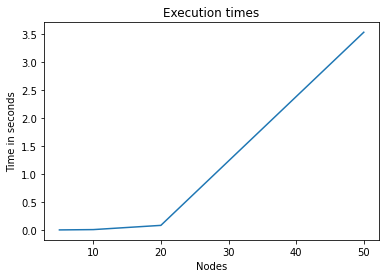

In [ ]:
# Α.2 Εκτέλεση αλγορίθμων και γραφική παράσταση χρόνων εκτέλεσης 
# Να συμπληρώσετε τον παρακάτω κώδικα.

k = 3
paths = ['graph_0005_01234.gexf', 'graph_0010_01234.gexf', 'graph_0020_01234.gexf',
         'graph_0050_01234.gexf']
execution_times = []
scores = []
for p in paths:
    start = default_timer()
    print('Graph: ' + p)
    G = nx.read_gexf(p, node_type=int)
    best_comb, min_score = brute_force(G, k)
    end = default_timer()
    execution_time = end - start
    execution_times.append(execution_time)
    scores.append(min_score)
    print('Execution time: ', execution_time)
    print('Best score: ', min_score)
    print('Best comb: ', best_comb)
    # draw_k_centers_graph(G, best_comb)

# Γραφική παράσταση
x = [5, 10, 20, 50]
plt.xlabel('Nodes')
plt.ylabel('Time in seconds')
plt.title('Execution times')
plt.plot(x, execution_times)
plt.show()

Ερώτημα Α.3) Να εφαρμόσετε τον “brute force” αλγόριθμο για την εύρεση της βέλτιστης λύσης των στιγμιοτύπων graph_0030_01234.gexf για τις τιμές
k=2, k=3, k=4 και k=5. Να μετρήσετε τον χρόνο εκτέλεσης του αλγορίθμου για κάθε περίπτωση, να τυπώσετε τους χρόνους εκτέλεσης και τους απεικονίσετε σε γραφική παράσταση. Στον άξονα των x να υπάρχουν οι τιμές του k.

k =  2
Execution time:  0.036361707999958526
k =  3
Execution time:  0.4188043359999938
k =  4
Execution time:  3.5050607979999313
k =  5
Execution time:  21.633297730999857


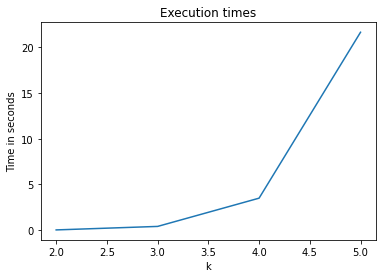

In [ ]:
# Α.3 Εκτέλεση αλγορίθμων και γραφική παράσταση χρόνων εκτέλεσης 
# Να συμπληρώσετε τον παρακάτω κώδικα.

G = nx.read_gexf('graph_0030_01234.gexf', node_type=int)
execution_times = []
for k in range(2, 6):
    start = default_timer()
    print('k =  ' + str(k))
    best_comb, min_score = brute_force(G, k)
    end = default_timer()
    execution_time = end - start
    execution_times.append(execution_time)
    print('Execution time: ', execution_time)

# Γραφική παράσταση
x = [2, 3, 4, 5]
plt.xlabel('k')
plt.ylabel('Time in seconds')
plt.title('Execution times')
plt.plot(x, execution_times)
plt.show()

Ερώτημα Α.4) Χρησιμοποιώντας τον brute force αλγόριθμο ή παραλλαγή του, να βρείτε όσο μπορείτε καλύτερες λύσεις για τα στιγμιότυπα
graph_0146_01234.gexf με k = 13 και 
graph_0500_01234.gexf με k = 13.

In [ ]:
# Α.4
# Να συμπληρώσετε τον παρακάτω κώδικα.

def ran_comb(k, max):
    comb = []
    i = 0
    while i < k:
        ran = random.randint(0, max)
        if ran not in comb:
            comb.append(ran)
            i += 1
    return comb

def k_center_brute_force_based(G, k, max_iterations):
  start = default_timer()

  min_score = 100000
  i = 0
  max_center = len(G) - 1
  changed = k -1
  final_score = 10000
  progress = False
  my_comb = ran_comb(k, max_center - 1)
  # my_comb = [150, 484, 29, 234, 92, 309, 475, 472, 494, 316, 454, 178, 8]  # 500 -> 1785
  # my_comb = [67, 135, 124, 119, 121, 80, 33, 56, 31, 82, 55, 64, 70]  # 146 -> 677
  min_score = k_centers_objective_value(G, my_comb)
  print('Starting with score ', min_score)
  rounds = 0
  for iterations in range(max_iterations):
      if changed == i:
          rounds += 1
          print('Round: ' + str(rounds) + ' with score: ' + str(min_score))
          if min_score < final_score:
              final_score = min_score
              final_comb = best_comb.copy()
          if rounds > 1:
              print('Found local minimum. Best score yet is ', final_score)
              print('Best combination: ', final_comb)
              print('Trying new combination ..')
              my_comb = ran_comb(k, max_center - 1)
              rounds = 0
              min_score = 10000
      prev_comb = my_comb.copy()
      for j in range(0, max_center):
          center = j
          if center not in my_comb:
              my_comb[i] = center
          score = k_centers_objective_value(G, my_comb)
          if score < min_score:
              # print('New best score: ', score)
              min_score = score
              best_comb = my_comb.copy()
              changed = i
              progress = True
              break
      if not progress:
          my_comb = prev_comb.copy()
      i += 1
      if i > 12:
          i = 0
      progress = False

  end = default_timer()
  execution_time = end - start
  print('Execution time: ', execution_time)
  print('Best comb ', final_comb)
  print('Best Score: ', final_score)

k = 13
G = nx.read_gexf('graph_0146_01234.gexf', node_type=int)
k_center_brute_force_based(G,k,1000)
G = nx.read_gexf('graph_0500_01234.gexf', node_type=int)
k_center_brute_force_based(G,k,1000)

Starting with score  1133.0
Round: 1 with score: 737.0
Round: 2 with score: 737.0
Round: 3 with score: 737.0
Found local minimum. Best score yet is  737.0
Best combination:  [31, 2, 10, 134, 5, 59, 17, 123, 41, 70, 20, 80, 4]
Trying new combination ..
Round: 1 with score: 829.0
Round: 2 with score: 829.0
Round: 3 with score: 829.0
Found local minimum. Best score yet is  737.0
Best combination:  [31, 2, 10, 134, 5, 59, 17, 123, 41, 70, 20, 80, 4]
Trying new combination ..
Round: 1 with score: 804.0
Round: 2 with score: 804.0
Round: 3 with score: 804.0
Found local minimum. Best score yet is  737.0
Best combination:  [31, 2, 10, 134, 5, 59, 17, 123, 41, 70, 20, 80, 4]
Trying new combination ..
Round: 1 with score: 782.0
Round: 2 with score: 782.0
Round: 3 with score: 782.0
Found local minimum. Best score yet is  737.0
Best combination:  [31, 2, 10, 134, 5, 59, 17, 123, 41, 70, 20, 80, 4]
Trying new combination ..
Round: 1 with score: 759.0
Round: 2 with score: 759.0
Round: 3 with score: 7

### Περιγραφή: Να δώσετε μια σύντομη περιγραφή της παραλλαγής του Brute-force που αναπτύξατε για το ερώτημα Α.4.

Ο αλγόριθμος ξεκινάει με ένα τυχαίο σετ κέντρων και προσπαθεί να βρεί το καλύτερο σκορ αλλάζοντας ένα κέντρο κάθε φορά. Δοκιμάζει να αλλάξει ένα κέντρο από το σετ κάθε φορά, τοποθετώντας όλους τους δυνατούς κόμβους στη θέση του. Αν βρει καλύτερο σκορ αλλάζει το κέντρο και συνεχίζει δοκιμάζοντας να αλλάξει άλλο κεντρο. Όταν δοκιμάσει να αλλάξει όλοα τα κέντρα ανεπυτυχώς τότε θεωρούμε πως πέρασε ένας γύρος. Στους 2 γύρους σταματάμε την προσπάθεια θεωρώντας ότι βρήκαμε το τοπικό ελάχιστο και ξεκινάμε με καινούργιο τυχαίο σετ.
Για να μην τρέχει επ αόριστον βάζουμε ένα όριο max_iterations.

## Ερώτημα B: Greedy Algorithm

### Ερώτημα Β.1) Να υλοποιήσετε τον “greedy” αλγόριθμο από το βιβλίο Σχεδίαση Αλγορίθμων, Ενότητα 11.2

In [ ]:
def k_centers_greedy(G, k, first_center=None, seed=None):
    distance_from_centers = {}
    centers = []
    if first_center == None:
      max_center = len(G) - 1
      first_center = random.randint(0,max_center)
    centers.append(first_center)
    
    while len(centers) < k:
        max_dist_from_c = 0
        centers_length = len(centers)
        if len(centers) > 1:
            for node in G:
                dist_from_c = []
                for c in centers:
                    if node == c:
                        dist_from_c.append(0)
                    else:
                        x = int(G[node][c]['weight'])
                        dist_from_c.append(x)
                min_dist = min(dist_from_c)
                if min_dist > max_dist_from_c:
                    max_dist_from_c = min_dist
                    index = node
        else:
            max_weight = 0
            for n in G:
                if n != centers[0]:
                    if G[n][centers[0]]['weight'] > max_weight:
                        max_weight = G[n][first_center]['weight']
                        index = n
        centers.append(index) 
    score = k_centers_objective_value(G, centers)   
    # print('centers are: ' + str(centers))
    # print('Score: ', score)
    return score, centers

In [ ]:
# Έλεγχος και αξιολόγηση της απάντησης. Μην κάνετε αλλαγές στο κελί αυτό.

G = nx.read_gexf('graph_0020_01234.gexf', node_type=int)
assert_equal(k_centers_greedy(G, 3, first_center=5), (471.0, [5, 8, 15]))
assert_equal(k_centers_greedy(G, 3, first_center=8), (472.0, [8, 10, 15]))



2) Να εφαρμόσετε τον “greedy” αλγόριθμο για την εύρεση της βέλτιστης λύσης των στιγμιοτύπων με k=3 στους γράφους
graph_0005_01234.gexf, graph_0010_01234.gexf, graph_0020_01234.gexf και graph_0050_01234.gexf. Να μετρήσετε τον χρόνο εκτέλεσης του αλγορίθμου για κάθε περίπτωση και να απεικονίσετε τους χρόνους σε γραφική παράσταση. Στον άξονα των x να υπάρχει το πλήθος των κόμβων του γράφου.

1
2
centers are: [1, 0, 2]
Score:  130.0
1
2
centers are: [8, 0, 2]
Score:  257.0
1
2
centers are: [10, 1, 9]
Score:  506.0
1
2
centers are: [13, 21, 11]
Score:  907.0


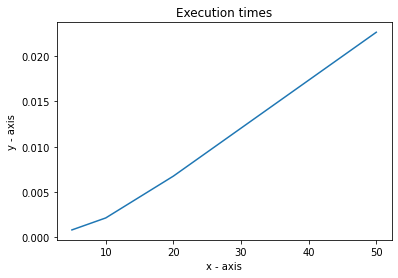

In [ ]:
# Β.2 Εκτέλεση αλγορίθμων και γραφική παράσταση χρόνων εκτέλεσης 
execution_times = []
k = 3
paths = ['graph_0005_01234.gexf','graph_0010_01234.gexf','graph_0020_01234.gexf','graph_0050_01234.gexf']
for path in paths:
    start = default_timer()
    G = nx.read_gexf(path, node_type=int)
    k_centers_greedy(G, k)
    end = default_timer()
    execution_time = end - start
    execution_times.append(execution_time)

# Γραφική παράσταση
x = [5, 10, 20, 50]

plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Execution times')
plt.plot(x, execution_times)
plt.show()

3) Να εφαρμόσετε τον “greedy” αλγόριθμο για την εύρεση της βέλτιστης λύσης των στιγμιοτύπων graph_0030_01234.gexf για τις τιμές
k=2, k=3, k=4 και k=5. Να μετρήσετε τον χρόνο εκτέλεσης του αλγορίθμου για κάθε περίπτωση, να τυπώσετε τους χρόνους εκτέλεσης και τους απεικονίσετε σε γραφική παράσταση. Στον άξονα των x να υπάρχουν οι τιμές του k.

k =  2
1
centers are: [18, 25]
Score:  676.0
Execution time:  0.00037635199987562373
k =  3
1
2
centers are: [13, 0, 25]
Score:  619.0
Execution time:  0.0005785100001958199
k =  4
1
2
3
centers are: [6, 5, 2, 28]
Score:  574.0
Execution time:  0.0009313430000474909
k =  5
1
2
3
4
centers are: [28, 3, 21, 2, 0]
Score:  471.0
Execution time:  0.002354180000111228


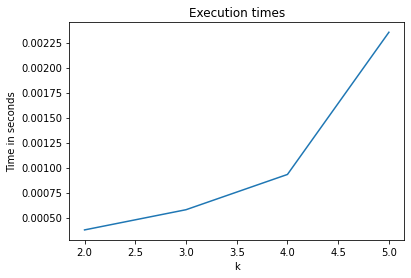

In [ ]:
# Β.3 Εκτέλεση αλγορίθμων και γραφική παράσταση χρόνων εκτέλεσης 

G = nx.read_gexf('graph_0030_01234.gexf', node_type=int)
execution_times = []
for k in range(2, 6):
    start = default_timer()
    print('k =  ' + str(k))
    best_comb, min_score = k_centers_greedy(G, k)
    end = default_timer()
    execution_time = end - start
    execution_times.append(execution_time)
    print('Execution time: ', execution_time)

# Γραφική παράσταση
x = [2, 3, 4, 5]
plt.xlabel('k')
plt.ylabel('Time in seconds')
plt.title('Execution times')
plt.plot(x, execution_times)
plt.show()

4) Χρησιμοποιώντας τον “greedy” αλγόριθμο ή παραλλαγή του, να βρείτε όσο μπορείτε καλύτερες λύσεις για τα στιγμιότυπα
graph_0146_01234.gexf με k = 13 και 
graph_0500_01234.gexf με k = 13.

In [ ]:
# python code
def k_center_greedy_based(G, k):
    best_score = 10000
    for i in range(0,len(G)-1):
      score, centers = k_centers_greedy(G,k,first_center = i)
      if score < best_score:
        best_score = score
        best_centers = centers.copy()
        print('Best score yet: ', score)
        print('Best comb: ', centers)
    return best_score, best_centers

k = 13
G = nx.read_gexf('graph_0146_01234.gexf', node_type=int)
k_center_greedy_based(G,k)
G = nx.read_gexf('graph_0500_01234.gexf', node_type=int)
k_center_greedy_based(G,k)

Best score yet:  857.0
Best comb:  [0, 1, 125, 64, 127, 92, 58, 23, 19, 85, 52, 12, 63]
Best score yet:  850.0
Best comb:  [3, 125, 2, 1, 64, 38, 136, 65, 85, 48, 52, 0, 99]
Best score yet:  847.0
Best comb:  [7, 32, 96, 112, 91, 103, 127, 6, 90, 140, 113, 69, 83]
Best score yet:  842.0
Best comb:  [22, 92, 11, 128, 1, 127, 79, 124, 19, 85, 14, 139, 117]
Best score yet:  833.0
Best comb:  [25, 2, 72, 145, 52, 57, 86, 10, 140, 108, 141, 28, 103]
Best score yet:  829.0
Best comb:  [66, 145, 2, 1, 52, 72, 10, 140, 115, 5, 74, 103, 63]


(829.0, [66, 145, 2, 1, 52, 72, 10, 140, 115, 5, 74, 103, 63])

### Περιγραφή: Να δώσετε μια σύντομη περιγραφή της παραλλαγής του Brute-force που αναπτύξατε για το ερώτημα Β.4.

Ο αλγόριθμος είναι μια παραλλαγή greedy με brute_force. Δοκιμάζουμε τον αρχικό greedy για κάθε δυνατό αρχικό κέντρο και έτσι βρίσκουμε το καλύτερο δυνατό αποτέλεσμα του greedy

## Ερώτημα Γ: Αυτοσχέδιος αλγόριθμος και μπόνους

Να αναπτύξετε αυτοσχέδιο αλγόριθμο ή αλγορίθμους για το πρόβλημα του k-center χρησιμοποιώντας όποιες αλγοριθμικές τεχνικές επιθυμείτε, αρκεί να γνωρίζετε πως και γιατί δουλεύουν. Να εφαρμόσετε τον αλγόριθμο ή τους αλγορίθμους για να βρείτε όσο καλύτερες λύσεις μπορείτε για τα στιγμιότυπα
graph_0146_01234.gexf και graph_0500_01234.gexf με k = 13. 
Προαιρετικά μπορείτε να ανακοινώνετε το κόστος των καλύτερων λύσεων (όχι ποιους κόμβους περιλαμβάνουν) στο θέμα
https://www.deece.edu.gr/forum/viewtopic.php?f=222&t=9134.


In [ ]:
# python code
def k_center_algorithm(G, k, max_iterations):
  min_score = 100000
  i = 0
  max_center = len(G) - 1
  changed = k -1
  final_score = 10000
  progress = False
  my_comb = ran_comb(k, max_center - 1)
  # my_comb = [150, 484, 29, 234, 92, 309, 475, 472, 494, 316, 454, 178, 8]  # 500 -> 1785
  # my_comb = [67, 135, 124, 119, 121, 80, 33, 56, 31, 82, 55, 64, 70]  # 146 -> 677
  min_score = k_centers_objective_value(G, my_comb)
  final_score = min_score
  rounds = 0
  for iterations in range(max_iterations):
      if changed == i:
          rounds += 1
          print('Round: ' + str(rounds) + ' with score: ' + str(min_score))
          if min_score < final_score:
              final_score = min_score
              final_comb = best_comb.copy()
          if rounds > 2:
              print('Found local minimum. Best score yet is ', final_score)
              print('Best combination: ', final_comb)
              print('Trying new combination ..')
              my_comb = ran_comb(k, max_center - 1)
              rounds = 0
              min_score = 10000
      prev_comb = my_comb.copy()
      for j in range(0, max_center):
          center = random.randint(0, max_center)
          if center not in my_comb:
              my_comb[i] = center
              for j2 in range(0, max_center):
                  center2 = random.randint(0, max_center)
                  if center2 not in my_comb:
                      if i == k -1 :
                          my_comb[0] = center2
                      else:
                          my_comb[i + 1] = center2
                      for j3 in range(0, max_center):
                        center3 = random.randint(0, max_center)
                        if center3 not in my_comb:
                          if i == k - 1:
                              my_comb[1] = center3
                          else:
                              if i == k - 2:
                                  my_comb[0] = center3
                              else:
                                  my_comb[i + 2] = center3
                  score = k_centers_objective_value(G, my_comb)
                  if score < min_score:
                      print('New best score: ', score)
                      min_score = score
                      best_comb = my_comb.copy()
                      changed = i
                      progress = True
                      break
          if progress:
              break
      if not progress:
          my_comb = prev_comb.copy()
      i += 1
      if i > 12:
          i = 0
      progress = False

  end = default_timer()
  execution_time = end - start
  print('Execution time: ', execution_time)
  print('Best comb ', final_comb)
  print('Best Score: ', final_score)


In [ ]:
# Καλύτερη λύση για το πρόβλημα graph_0146_01234.gexf
best_cost_0146 = 677
best_centers_0146 = [67, 135, 124, 119, 121, 80, 33, 56, 31, 82, 55, 64, 70]

k = 13
G = nx.read_gexf('graph_0146_01234.gexf', node_type=int)
k_center_algorithm(G, k, 1000)

New best score:  1326.0
New best score:  992.0
New best score:  957.0
New best score:  941.0
New best score:  921.0
New best score:  851.0
New best score:  850.0
New best score:  832.0
New best score:  827.0
New best score:  793.0
New best score:  782.0
New best score:  779.0
New best score:  769.0
New best score:  756.0
New best score:  746.0
New best score:  744.0
New best score:  738.0
New best score:  724.0
Round: 1 with score: 724.0
Round: 2 with score: 724.0
Round: 3 with score: 724.0
Found local minimum. Best score yet is  724.0
Best combination:  [31, 131, 73, 2, 91, 88, 106, 68, 49, 79, 36, 70, 134]
Trying new combination ..
New best score:  1376.0
New best score:  1182.0
New best score:  1093.0
New best score:  994.0
New best score:  980.0
New best score:  958.0
New best score:  943.0
New best score:  933.0
New best score:  919.0
New best score:  846.0
New best score:  820.0
New best score:  808.0
New best score:  805.0
New best score:  800.0
New best score:  799.0
New best s

In [ ]:
# Έλεγχος και αξιολόγηση της απάντησης. Μην κάνετε αλλαγές στο κελί αυτό.

In [ ]:
# Καλύτερη λύση για το πρόβλημα graph_0500_01234.gexf
best_cost_0500 = 1785
best_centers_0500 = [150, 484, 29, 234, 92, 309, 475, 472, 494, 316, 454, 178, 8]
k = 13
G = nx.read_gexf('graph_0146_01234.gexf', node_type=int)
k_center_algorithm(G, k, 1000)

In [ ]:
# Έλεγχος και αξιολόγηση της απάντησης. Μην κάνετε αλλαγές στο κελί αυτό.

### Περιγραφή: Να δώσετε μια σύντομη περιγραφή της παραλλαγής του Brute-force που αναπτύξατε για το ερώτημα Γ.

Αυτός ο αλγόριθμος βασίζεται στο σκεπτικό του αλγορίθμου στο Α4. Αυτή τη φορά προσπαθούμε να βρούμε το τοπικό ελάχιστο αλλάζοντας 3 κεντρα κάθε φορά. Έτσι ο αλγόριθμος μπορεί να βρει καλύτερο σκορ αλλά χρειάζεται περισσότερο χρόνο.
Αυτό μπορούμε να το εκμεταλλέυτούμε ξεκινώντας τον αλγόριθμο με ένα γνωστό καλό συνδιασμό κέντρων απο άλλο ερώτημα και να δουμε αν βετιωθεί το σκορ.
Για να μην τρέχει επ αόριστον βάζουμε ένα όριο max_iterations.

Βρήκαμε το καλύτερο γνωστό σκορ για τον graph_0146_01234.gexf και το 2ο καλύτερο για τον graph_0500_01234.gexf.